In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import skimage as ski
from skimage import data, io
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tqdm import tqdm
from PIL import Image


In [2]:
df = pd.read_csv('data/classes.csv')

In [3]:
df

,image_name,class
0,oak1.jpg,oak
1,oak2.jpg,oak
2,oak3.jpg,oak
3,oak4.jpg,oak
4,oak5.jpg,oak
...,...,...
8658,hazel452.jpg,hazel
8659,hazel453.jpg,hazel
8660,hazel454.jpg,hazel
8661,hazel455.jpg,hazel


In [4]:
df['class'].unique()

array(['oak', 'maple', 'nettle', 'hazel'], dtype=object)

In [5]:
df = df[(df['class'] == 'oak') | (df['class'] == 'maple')]

In [6]:
oak_pics ='data/'+df[df['class']=='oak']['image_name']
type(oak_pics)

pandas.core.series.Series

In [7]:
maple_pics ='data/'+df[df['class']=='maple']['image_name']
len(maple_pics)

3703

In [8]:
nettle_pics ='data/'+df[df['class']=='nettle']['image_name']
len(nettle_pics)

0

In [9]:
hazel_pics ='data/'+df[df['class']=='hazel']['image_name']
len(hazel_pics)

0

In [10]:
hazel_pics

Series([], Name: image_name, dtype: object)

In [11]:
oak_list, maple_list, nettle_list, hazel_list = [], [], [], []
for i in range(0, 3495):
    oak_list.append(oak_pics[i])
for i in range(3495, 7198):
    maple_list.append(maple_pics[i])
# for i in range(7198, 8207):
#     nettle_list.append(nettle_pics[i])
# for i in range(8207, 8663):
#     hazel_list.append(hazel_pics[i])

In [12]:
oak_pics_list = io.imread_collection(oak_list)
maple_pics_list = io.imread_collection(maple_list)
# nettle_pics_list = io.imread_collection(nettle_list)
# hazel_pics_list = io.imread_collection(hazel_list)

## Create test val train datasets

In [13]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=4666)
val_df, test_df = train_test_split(val_df, test_size = .50, random_state=4666)

In [14]:
df

,image_name,class
0,oak1.jpg,oak
1,oak2.jpg,oak
2,oak3.jpg,oak
3,oak4.jpg,oak
4,oak5.jpg,oak
...,...,...
7193,maple3699.jpg,maple
7194,maple3700.jpg,maple
7195,maple3701.jpg,maple
7196,maple3702.jpg,maple


In [15]:
## Reduce overfit by shearing, zoom, flip
train_datagen = ImageDataGenerator(rescale=1./255., shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255.)


In [30]:
train_generator=train_datagen.flow_from_dataframe(dataframe=train_df, directory="./data/", x_col="image_name", y_col="class", subset="training", batch_size=32, seed=4666, shuffle=True, class_mode="categorical", target_size=(100,100))


Found 5398 validated image filenames belonging to 2 classes.


In [31]:
val_generator=test_datagen.flow_from_dataframe(dataframe=val_df, directory="./data/", x_col="image_name", y_col="class", batch_size=32, seed=4666, shuffle=True, class_mode="categorical", target_size=(100,100))


Found 900 validated image filenames belonging to 2 classes.


In [32]:
test_generator=test_datagen.flow_from_dataframe(dataframe=test_df, directory="./data/", x_col="image_name", y_col="class", batch_size=32, seed=4666, shuffle=False, class_mode="categorical", target_size=(100,100))

Found 900 validated image filenames belonging to 2 classes.


In [29]:
train_generator

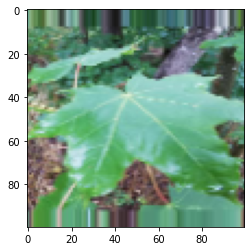

In [38]:
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()
    

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer = 'rmsprop', metrics=["accuracy"])

In [ ]:
# model.fit_generator(train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=val_generator,
#                     validation_steps=STEP_SIZE_VAL,
#                     epochs=10)